In [1]:
!pip install fuzzy-c-means

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [1]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
y = iris.target

n_samples = 5000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

In [5]:
fcm = FCM(n_clusters=3)
fcm.fit(X)

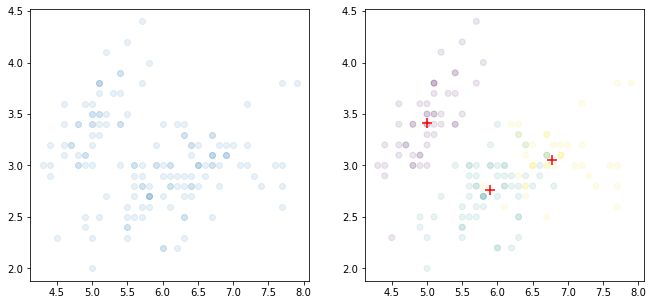

In [6]:
# outputs
fcm_centers = fcm.centers
#fcm_labels = fcm.predict(X)
fcm_labels  = fcm.u.argmax(axis=1)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1],  c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1],  marker="+", s=100, c='r')
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=3)

In [10]:
label = kmeans.fit_predict(X)

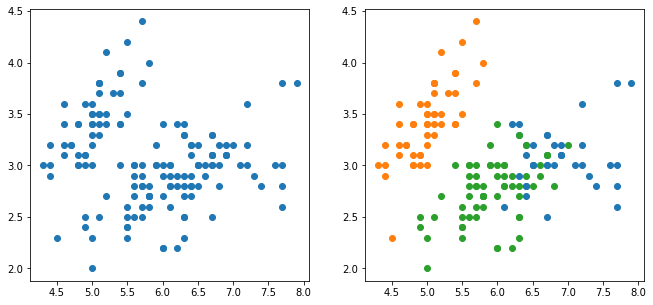

In [11]:
#filter rows of original data
filtered_label0 = X[label == 0]
filtered_label1 = X[label == 1]
filtered_label2 = X[label == 2]
f, axes = plt.subplots(1, 2, figsize=(11,5))
#plotting the results
axes[0].scatter(X[:,0], X[:,1], alpha=1)
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1])
plt.show()

In [14]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [15]:
fcm_RI = adjusted_rand_score(fcm_labels, y)
print('\nFCM Random Index validation:', fcm_RI)

fcm_NMI = normalized_mutual_info_score(fcm_labels, y)
print('\nFCM NMI validation', fcm_NMI)


FCM Random Index validation: 0.7294203486015404

FCM NMI validation 0.7496230990140849


In [16]:
k_means_RI = adjusted_rand_score(kmeans.labels_, y)
print('\nK-MeansRandom Index validation:', k_means_RI)

k_means_NMI = normalized_mutual_info_score(label, y)
print('\nK-Means NMI validation: ', k_means_NMI)


K-MeansRandom Index validation: 0.7302382722834697

K-Means NMI validation:  0.7581756800057784
